In [9]:
DATA_PATH = "../saved_runs/2021-01-02 19:33:40.852502-TEST-deep-regression-wordlevel"

In [2]:
def mae_coordinates(true, predicted):
    mae = np.abs(true - predicted).mean(axis=0)
    return (mae[0] + mae[1]) / 2


def class_accuracy(true, predicted):
    return (np.array(true) == np.array(predicted)).mean()


def mse_coordinates(true, predicted):
    mse = np.square(true - predicted).mean(axis=0)
    return (mse[0] + mse[1]) / 2

In [3]:
import json
import pandas as pd
import numpy as np

def stats_train_val(path):
    # f = open(path + "/config.json")
    # config = json.load(f)
    # tr = config["class_logic"]["kmeans"]["num_clusters"]
    # print(tr)
    # df_train = pd.read_csv(path + "/train_results.csv", index_col=0)
    df_val = pd.read_csv(path + "/val_results.csv", index_col=0)

    # true_train = np.column_stack([df_train["lat"], df_train["long"]])
    # predict_train = np.column_stack([df_train["predict_lat"], df_train["predict_long"]])
    # mae_train = mae_coordinates(true_train, predict_train)
    # mse_train = mse_coordinates(true_train, predict_train)

    true_val = np.column_stack([df_val["lat"], df_val["long"]])
    predict_val = np.column_stack([df_val["predicted_lat"], df_val["predicted_long"]])
    mae_val = mae_coordinates(true_val, predict_val)
    mse_val = mse_coordinates(true_val, predict_val)

    # print(f"MAE TRAIN: {mae_train}")
    # print(f"MSE TRAIN: {mse_train}")
    print(f"MAE   VAL: {mae_val}")
    print(f"MSE   VAL: {mse_val}")

    print(f"{mae_val:.3f} & {mse_val:.3f} \\\\")
    return mae_val


In [10]:
stats_train_val(DATA_PATH)

MAE   VAL: 0.49747171765557757
MSE   VAL: 0.5397466769942101
0.497 & 0.540 \\


0.49747171765557757

In [19]:
lat_train_loss = [3.5602, 0.9542, 0.7210, 0.6848, 0.6474, 0.6130, 0.6173, 0.5822, 0.5834, 0.5491, 0.5238,  0.5630,0.5417, 0.5044,  0.5451, 0.4746, 0.4745, 0.4671, 0.4293, 0.4319]
lat_val_loss = [ 1.3791,  0.8527, 1.1221, 1.0101, 0.5287, 0.5713, 0.5110, 0.7272, 0.5911, 0.8604, 0.4869,0.7143,   0.5845, 0.7134, 0.4808, 0.5825, 0.5133, 0.5153,  0.5184, 0.5123]

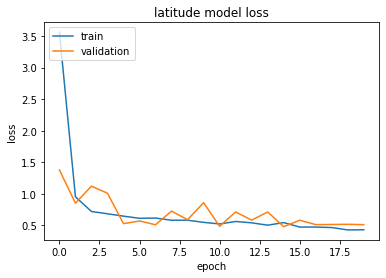

In [20]:
import matplotlib.pyplot as plt

plt.plot(lat_train_loss)
plt.plot(lat_val_loss)
plt.title('latitude model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [15]:
long_train_loss = [1.1543, 0.5939, 0.5465, 0.5296, 0.4977, 0.6231, 0.6367, 0.5224, 0.4878,  0.449, 0.4202]
long_val_loss = [0.8631,0.5341,  0.5832, 0.5084, 0.5125, 0.5076,  0.5489, 0.5449, 0.5585, 0.633,  0.5278]

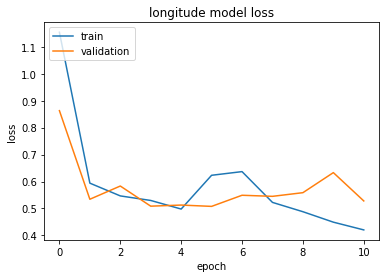

In [21]:
import matplotlib.pyplot as plt

plt.plot(long_train_loss)
plt.plot(long_val_loss)
plt.title('longitude model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()